<a href="https://colab.research.google.com/github/DeisyData/BIT_IA_Bootcamp/blob/main/S15_C5_Diagramas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install diagrams

In [2]:
!pip install Sagemaker

In [4]:
from diagrams import Diagram, Edge, Cluster
from diagrams.custom import Custom
from diagrams.programming.language import Python
from diagrams.aws.storage import S3
from diagrams.aws.ml import SagemakerTrainingJob, SagemakerModel

## Paso 1. Lista de los elementos


1.    Archivos  ( files)
*  Datos de entrenamiento: train_s3.csv
*  Datos de prueba: test_s3.csv
*  Lógica del entrenamiento: script3.py
2.    Aplicaciones-API-Storage  ( files)
*  bucket
* SagemakerTrainingJob
* SagemakerModel
* endPoint

## Paso 2.  Definir los flujos de trabajo

Consiste en alistar los conjuntos de datos de entrenamiento y prueba, así como la lógica de entrenamiento. Los datos se almacenans en *S3* y el entrenamiento se hace en *SageMaker* y el despliegue del modelo se pone en un "EndPoint"

Ejemplo:
Jupyter>> DataTrain >> S3
Jupyter>> DataTest >> S3

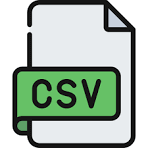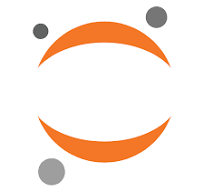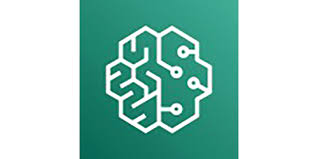

[Para hacer los clusters ](https://diagrams.mingrammer.com/)

https://github.com/mingrammer/diagrams?tab=readme-ov-file

In [26]:
with Diagram("AWS: Training Workflow", show=False):
  #Archivos
  script = Python("script3.py")
  icon_file_path = "csvFile.png"
  train_data = Custom("train_s3.csv", icon_file_path)
  test_data = Custom("test_s3.csv", icon_file_path)


  #aplicaciones
  icon_file_path_2 = "jupyter.png"
  jupyter = Custom("S15_C2_AWS.ipynb", icon_file_path_2)

  #Storage S3
  s3_bucket = S3("bucket: s15c3deisy")
  s3_folder = S3("folder: radomForestModel")

  # SageMaker
  training = SagemakerTrainingJob("sklearn_estimator (ml.m5.large)")
  model  = SagemakerModel("rf_model.tar.gz")

  # Endpoint para el despliegue del modelo
  icon_file_path_3 = "endPoint.jpeg"
  endPoint = Custom("End point: sklearn-model-2025-01-23", icon_file_path_3)

  # Flujo de trabajo Cargar documentos
  blob:https://colab.research.google.com/4f6acdb6-25df-45eb-a70b-c9ac1311133djupyter >> train_data >> Edge(label="Sube a S3")>> s3_folder
  jupyter >> test_data >> Edge(label="Sube a S3") >> s3_folder
  s3_folder >> Edge(label="esta en") >> s3_bucket

  # Flujo de trabajo Entrenamiento
  jupyter >> script >> Edge(label="envia a SageMaker") >> training

  s3_bucket >>  Edge(label="envia train_s3.csv ") >> training
  s3_bucket >>  Edge(label="envia test_s3.csv ") >> training

  training >> Edge(label="crea el modelo") >> model

  # Flujo de trabajo despliegue
  model >> Edge(label="depliega en") >> endPoint


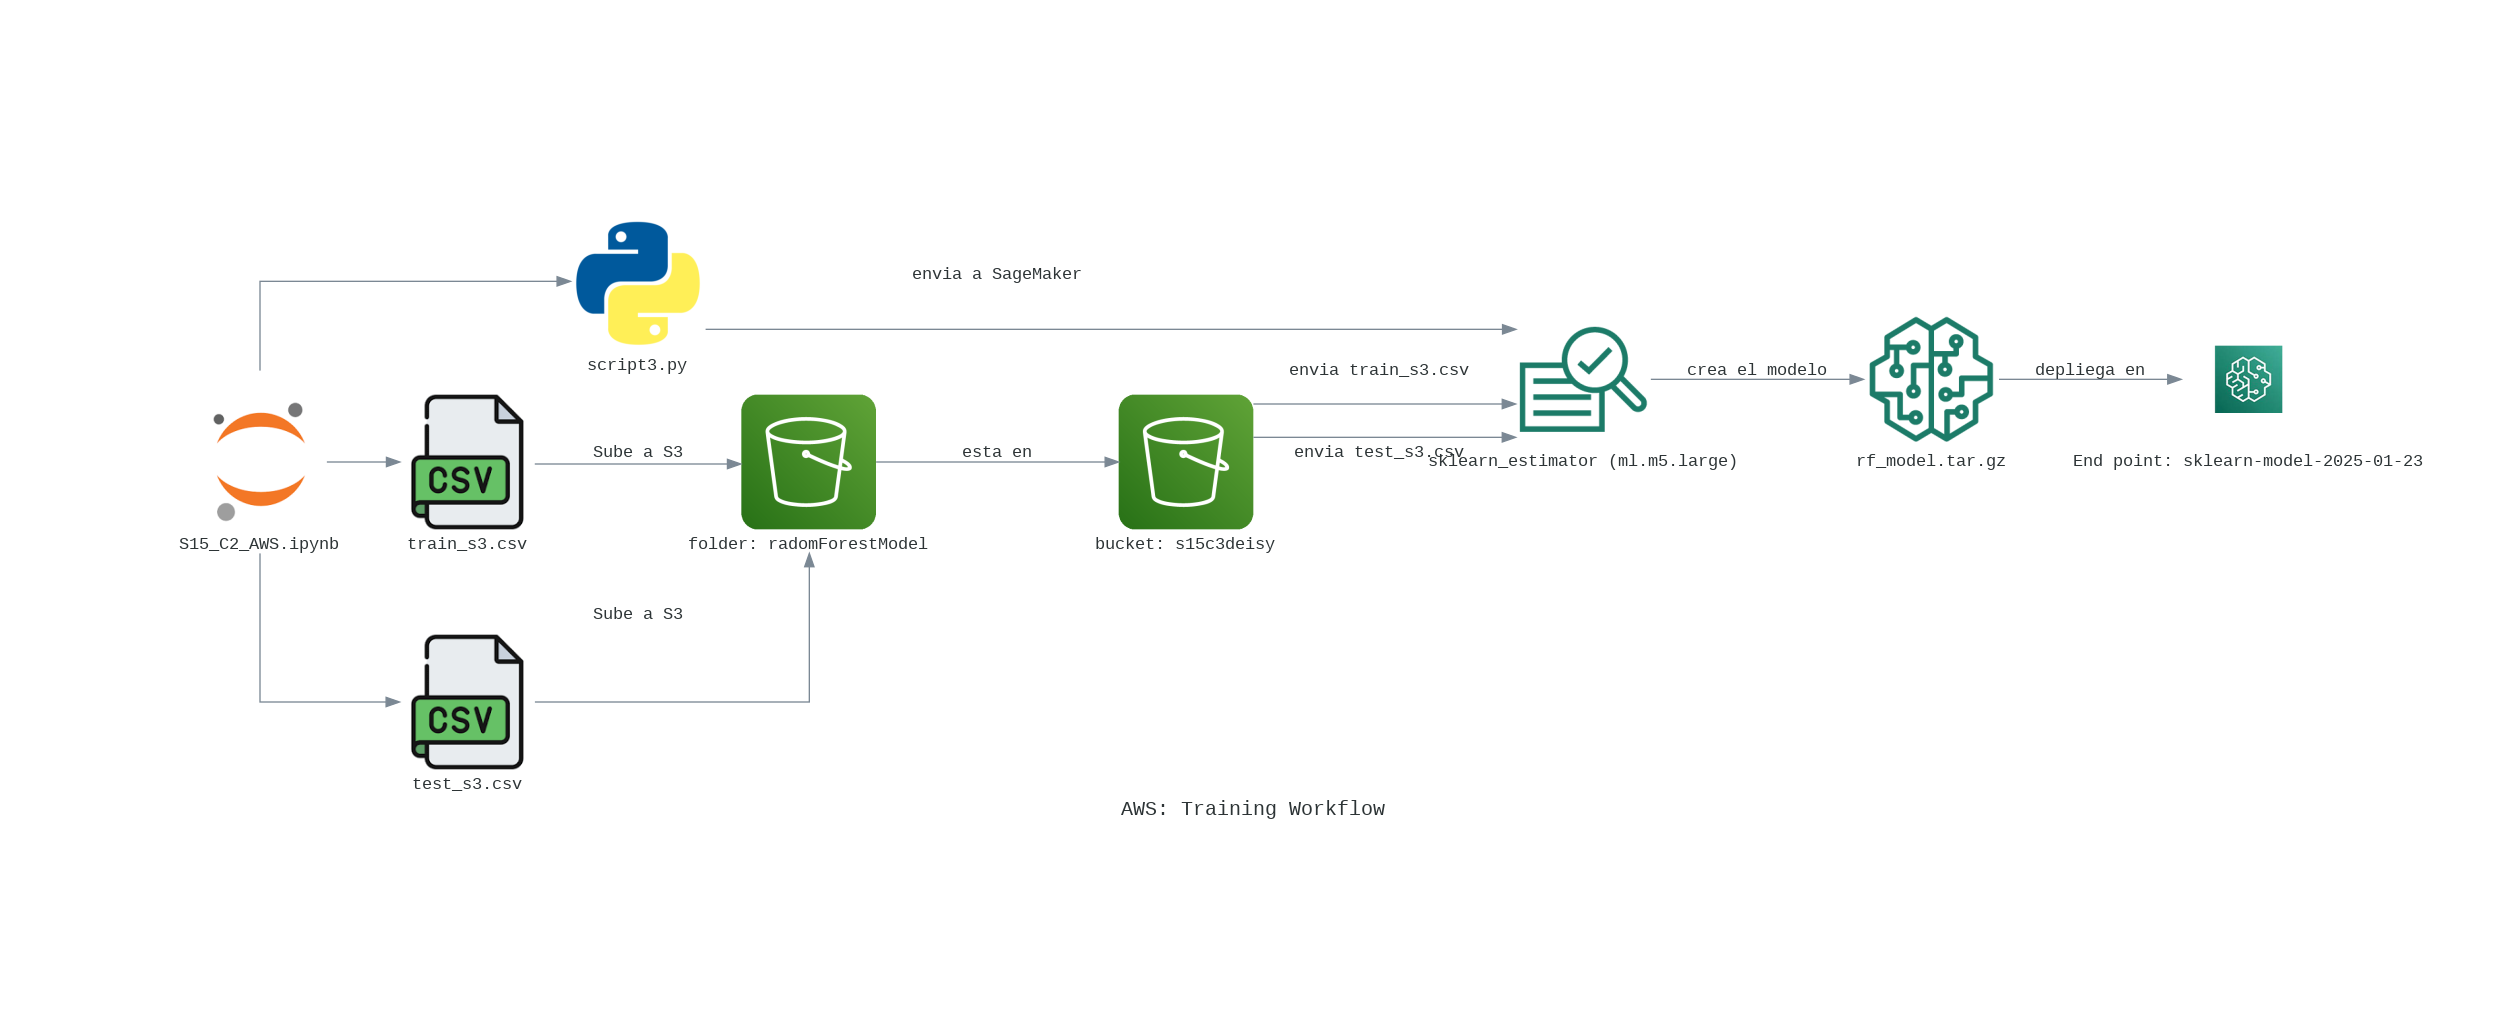